In [1]:
import Pkg; Pkg.activate("..")

In [2]:
using Revise
using DDA
using Plots
using LinearAlgebra
using StaticArrays


In [ ]:
1+1

In [32]:
function E_inc(E0, kvec, r)
    

    field(r, E::PlaneWave) = E.E0 * exp(-im * dot(E.k, r))
    field(r::Matrix, E::PlaneWave) = [field(ri, E) for ri in eachcol(r)]
    

end


In [ ]:
PyDDA

In [33]:
# Lattice
# Dipole coordinates
# Polarizability
# Solver
# - incident field
# - interaction matrix
# - extinction scattering and absorption cress sections
# - scattered and total field

Incident wave:
$$
E_{inc,j} = E_0 \exp(-i k r_j - i \omega t)
$$

In [148]:
# lab frame vs target frame

struct PlaneWave2
    E0::Complex{Float64}
    e::SVector{2,Complex{Float64}}
    k::SVector{3,Float64}
end

In [149]:
PlaneWave2(1+1im, [1,2], [1,2,3])

PlaneWave2(1.0 + 0.0im, ComplexF64[1.0 + 0.0im, 2.0 + 0.0im], [1.0, 2.0, 3.0])

In [144]:
typeof(1. +im)

ComplexF64 (alias for Complex{Float64})

In [145]:
[1,2]

2-element Vector{Int64}:
 1
 2

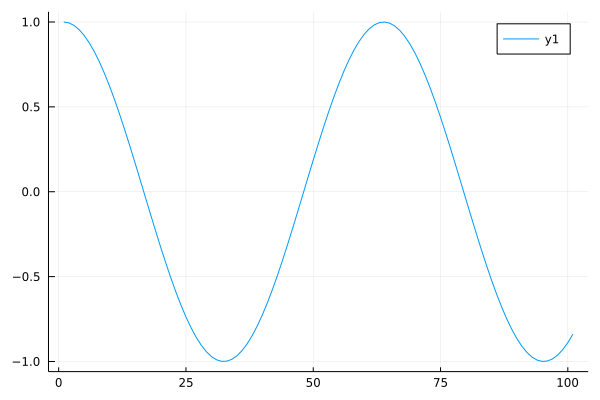

In [8]:

E_0 = 1.
k = [0, 0, 1.]
r_n = [1, 1, 1]
r = r_n * (0:0.1:10)'

E_inc = DDA.PlaneWave(E_0, k)
E = DDA.field(r[:,1], E_inc)
E = DDA.field(r, E_inc)

plot(real(E))


## Polarisability

Clausius-Mossotti polarizabilities:
$$
\alpha_j^{CM} = \frac{3d^3}{4\pi} \frac{\varepsilon_j - 1}{\varepsilon_j + 2}
$$

In [116]:
# Calculates Clausius-Mossoti polarizability of dipoles.
# Parameters
# ----------
# d : float
#     Dipole lattice spacing
# m : array_like
#     List of dipole refractive indexes
# polarizability_CM
"""
    polarizability_CM(eps, d) 

Calcualtes Clausius-Mossoti Polarizability of dipole array according to their refractive indexes `m` and lattice spacing `d`.

The Clausius-Mossoti polarizability of dipoles:
```math
\\alpha_j^{CM} = \\frac{3d^3}{4\\pi} \\frac{\\varepsilon_j - 1}{\\varepsilon_j + 2}
```

# Arguments:
- `d`: Dipole lattice spacing
- `eps`: complex permitivirty of dipole
"""
function polarizability_CM(eps, d) 
    return 3d^3 / 4pi * (eps - 1) / (eps +2)
end


polarizability_CM

In [10]:
# Calculates Lattice Dispersion Relation polarizability of dipoles.
# Calcualtes Lattice Dispersion Relation polarizability of dipole array according
# to their refractive indexes `m` and lattice spacing `d`.
# Parameters
# ----------
# d : float
#     Dipole lattice spacing
# m : array_like
#     List of dipole refractive indexes
# kvec : (3, 1) array_like
#     Wave vector [kx ky kz]     e.g. [0 0 1] z-direction
# E0 : (3, 1) array_like
#     E-field polarization [Ex Ey Ez]   e.g. [1 0 0] x-polarized,
#     [1 i 0] left-handed circ pol.
# 
# References
# ----------
# .. [1] Draine, Bruce T., and Jeremy Goodman. "Beyond Clausius-Mossotti-Wave propagation on a
# polarizable point lattice and the discrete dipole approximation."
# The Astrophysical Journal 405 (1993): 685-697.
#     

In [25]:
x, y = rand(3,100), rand(3,100)

([0.007633790950564601 0.5276186881680596 … 0.976976924840862 0.014147583323579571; 0.5131556544061433 0.08315394701353962 … 0.9771606865790883 0.6070183608447952; 0.5876860494350238 0.8302373110551486 … 0.06451201677784035 0.6145099134954057], [0.641188417686166 0.6017273994985193 … 0.22507644574299612 0.973395681498255; 0.6835978232953377 0.06326788179824194 … 0.564279593784413 0.18304140536980307; 0.1457344448714979 0.431978420031496 … 0.7297065654129462 0.8133218467361758])

In [32]:
dot(x,y)

76.67546297331322

In [41]:
normalize(rand(3))


3-element Vector{Float64}:
 0.7374937761869779
 0.0892855098261779
 0.6694258941963263

In [134]:
N = 10^7

S = 0
for i in 1:N
    S += sum((normalize(rand(3)) .* normalize(rand(3))).^2) / N
end
S

0.3333046813915861

In [133]:
typeof(10^4)

Int64

In [136]:
N = 10^8

S = 0
for i in 1:N
    S += sum((normalize(rand(3)) .* normalize([0,0,1])).^2) / N
end
S

0.33335548748348726

In [ ]:
# If CALPHA = LATTDR:
#    Compute dipole polarizability using "Lattice Dispersion Relation"
#    of Draine & Goodman (1993,ApJ,March 10).  It is required that
#    polarizability be such that an infinite lattice of such dipoles
#    reproduce the continuum dispersion relation for radiation
#    propagating with direction and polarization of radiation incident
#    on the DDA target.

# If CALPHA = GKDLDR:
#    Compute dipole polarizability using "Lattice Dispersion Relation"
#    of Gutkowicz-Krusin and Draine (2004)..  It is required that
#    polarizability be such that an infinite lattice of such dipoles
#    reproduce the continuum dispersion relation for radiation
#    propagating with direction and polarization of radiation incident
#    on the DDA target.  This is the recommended option.  It is nearly
#    but not exactly identical to LATTDR.

# If CALPHA = FLTRCD = "Filtered Discrete Dipole"
#    Compute dipole polarizability for "Filtered Coupled Dipole" approach
#    of Piller & Martin (1998) and Gay-Balmaz & Martin (2002)
#    and recently discussed by Yurkin, Min, & Hoekstra (2010)

# Clausius-Mossotti polarizability
# Lattice dispersion relation (Draine & Goodman 1993)

# Lattice dispersion relation (Draine & Goodman 1993)
# Compute sum (a_j*e_j)^2 , where a_j=unit propagation vector
#                                 e_j=unit polarization vector
# First compute Clausius-Mossotti polarizability:
# Determine polarizability by requiring that infinite lattice of
# dipoles have dipersion relation of continuum.


# Lattice dispersion relation: modified
# (Gutkowicz-Krusin & Draine 2004)
# First compute Clausius-Mossotti polarizability:
# Determine polarizability by requiring that infinite lattice of
# dipoles have dipersion relation of continuum.
# Radiative-reaction correction:

# prescription for alpha from Yurkin, Min & Hoekstra (2010):
# First compute Clausius-Mossotti polarizability:
# now apply corretion term
# Radiative-reaction correction
# Note that we are applying it differently from other authors
# (e.g., Piller & Martin 1998, Gay-Balmaz & Martin 2002, 
# Yurkin, Min & Hoekstra 2010) who would have
#              CXTERM=CXTERM/(1._WP+B1*CXTERM+CXTERM*CXRR)
# whereas we write
#              CXTERM=[CXTERM/(1._WP+B1*CXTERM)]/
#                     [1._WP+CXTERM*CXRR/(1._WP+B1*CXTERM)]
# although to leading order (x^3) they are the same


## Polarisability

Clausius-Mossotti polarizabilities:
$$
\alpha_j^{CM} = \frac{3d^3}{4\pi} \frac{\varepsilon_j - 1}{\varepsilon_j + 2}
$$

In [137]:
function polarizability_LDR93(eps, d, kvec, E0)
    b1 = -1.8915316
    b2 =  0.1648469
    b3 = -1.7700004
    
    a_hat = normalize(kvec)
    e_hat = normalize(E0)
    S = sum(@. (a * b)^2)
    alpha_CM = polarizability_CM(eps, d)
    return alpha_CM / (1 + alpha_CM / d^3 * ((b1 + eps * b2 + eps * b3 * S) * (k * d)^2) - 2/3 * im * (k * d)^3)
end

polarizability_LDR93 (generic function with 1 method)

In [108]:
a,b =[1,2,3], [1,2,3]
S = 0
for (ai, ei) in zip(a,b)
    S+= (ai*ei)^2
end
S

98

In [109]:
sum((ai*ei)^2 for (ai, ei) in zip(a, b))

98

98

Incident wave:
$$
E_{inc,j} = E_0 \exp(-i k r_j - i \omega t)
$$

In [35]:
# struct PlaneWave
#     E0
#     k
# end

# E_inc(r, E::PlaneWave) = E.E0 * exp(-im * E.k)
# E_inc_td(t, r, E::PlaneWave, omega) = field(E) * exp(im * omega * t)

k = [0 0 1]
# u = [0,0,1] polarisibility
E_inc(r, E_0, k) = E_0 * exp(-im * dot(k,r))


E_inc (generic function with 1 method)

In [36]:
k = [0, 0, 1.]
E_0 = 1.
r_n = [1, 1, 1] 
r = r_n * (0:0.1:10)'

# E_inc(r, E_0, k)

3×101 Matrix{Float64}:
 0.0  0.1  0.2  0.3  0.4  0.5  0.6  …  9.4  9.5  9.6  9.7  9.8  9.9  10.0
 0.0  0.1  0.2  0.3  0.4  0.5  0.6     9.4  9.5  9.6  9.7  9.8  9.9  10.0
 0.0  0.1  0.2  0.3  0.4  0.5  0.6     9.4  9.5  9.6  9.7  9.8  9.9  10.0

In [37]:
E_inc(r[:,1], E_0, k)

1.0 - 0.0im

┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1317


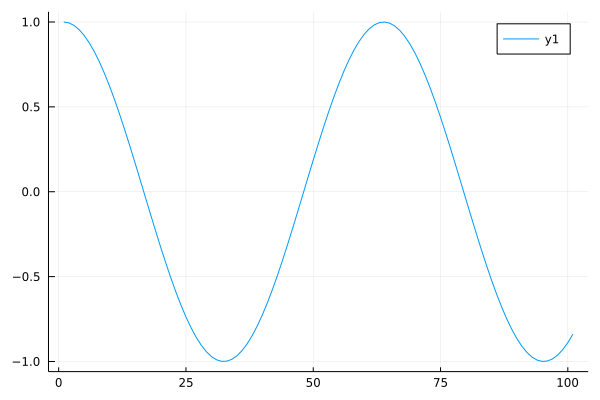

In [38]:
plot(real([E_inc(ri, E_0, k) for ri in eachcol(r)]))

In [40]:
k

3-element Vector{Float64}:
 0.0
 0.0
 1.0

The extinction cross section:
$$
C_{ext} = \frac{4 \pi k}{|E_0|^2} \sum \limits_{j=1}^{N} \mathrm{Im}(\vec{E}_{inc, j}^* \cdot P_j)
$$

The absorption cross section:
$$
C_{abs} = \frac{4 \pi k}{|E_0|^2} \sum \limits_{j=1}^{N} \left\{ \mathrm{Im}(P_j \cdot (\alpha_j^{-1}) \cdot P_j^*) - \frac{2}{3} k^3|P_j|^2 \right\}
$$

The scattering cross section 
$$
C_{sca} = C_{ext} - C_{abs}
$$

In the far field, the scattered electric field is given by:
$$
E_{sca} = \frac{k^2 \exp(ikr)}{r} \sum \limits_{j=1}^{N} \exp(-ik\hat{r} \cdot r_j)(\hat{r}\hat{r}-1_3)P_j
$$

In [11]:
function C_abs(k, E0, Ei, P, alph)
    A  = 4π * k / norm(E0)^2
    C=0
    for j in 1:N
        C +=  imag(P[j]*(1/alph[j]*I)*P[j]') - 2/3 *k^3 * P[j]^2 
        # C += 4π * k / norm(E0)^2 * sum(-imag(P[j]*(1/alph[j]*I)*P[j]') - 2/3 *k^3 * P[j]^2 ) 
        # !!!!!!!!!!!!!!
    end
    return A * C
end

C_ext(k, E0, Ei, P, alph) = 4pi * k / abs(E0)^2 * imag(dot(Ei, P))
C_sca = C_ext(k, E0, Ei, P, alph) - function C_abs(k, E0, Ei, P, alph)


function E_sca_FF(k, r, P, r_E)
    # k: wave number
    # r: dipole coordinates (N x 3 matrix)
    # P: polarizations (vector of length 3N; Px1,Py1,Pz1 ... PxN,PyN,PzN)
    # r_E: coord for the point at which to calculate the far field
    # Note: coordinates are relative to origin
    
    E=0
    r_norm = norm(r_E)
    r_hat = r_E / r_norm
    A = k^ 2 * exp(1m * k * r_norm) / r_norm
    for j in 1:N
        E += exp(-1m * k * dot(r_hat, r[j])) * (r_hat' .* r_hat - I)*P[j]
    end
    return A * E
end


C_abs (generic function with 1 method)

In [14]:
outer

C_ext (generic function with 1 method)

In [13]:
2/3

0.6666666666666666

The electric field from a radiating electric dipole:
$$
E = \frac{1}{4 \pi \varepsilon_0} \left\{
    k^2(\hat{r} \times p) \times \hat{r} \frac{e^{ikr}}{r} +
    \left[3\hat{r}(\hat{r}\cdot p)-p\right] \left( \frac{1}{r^3}-\frac{ik}{r^2} \right) e^{ikr}
\right\}
$$

$A_{jk}$ is the tensor that represents the interaction between a receiving dipole at $r_j$ and the radiating dipole
at $r_k$. 
$$
A_{jk} = \frac{\exp(i k r_{jk})}{r_{jk}} \left[
    k^2(\hat{r}_{jk} \hat{r}_{jk} - 11) + \frac{i k r_{jk} - 1}{r_{jk}^2} (3 \hat{r}_{jk} \hat{r}_{jk} - 11)
\right]
$$


In [125]:
function calculate_A_jk(r, k)
    r_jk = norm(r)
    r_n = r / r_jk

    A_jk = exp(im * k * r_jk) / r_jk * (k^2 * (r_n * r_n' - I) + (im * k * r_jk - 1) / (r_jk^2) * (3 * r_n * r_n' - I))
    return A_jk
end

calculate_A_jk (generic function with 1 method)

In [140]:
calculate_A_jk([1,0,1],0)

3×3 Matrix{ComplexF64}:
 -0.176777+0.0im       0.0+0.0im   -0.53033+0.0im
       0.0+0.0im  0.353553+0.0im        0.0+0.0im
  -0.53033+0.0im       0.0+0.0im  -0.176777+0.0im